<a href="https://colab.research.google.com/github/varun-kolli/Binary-Heap-Implementation/blob/master/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Varun_Kolli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

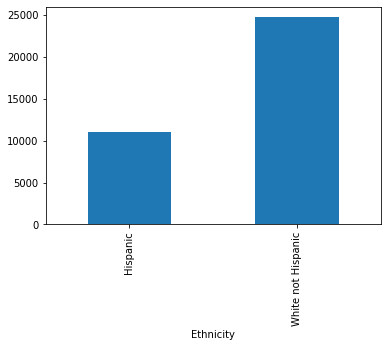

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
races = (df["Ethnicity"] == "Hispanic") | (df["Ethnicity"] == "White not Hispanic")
df_races = df[races]
gb = df_races.groupby('Ethnicity')['Expenditures'].mean()
gb.plot(kind='bar')
plt.show()



White groups had a higher expenditure rate

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

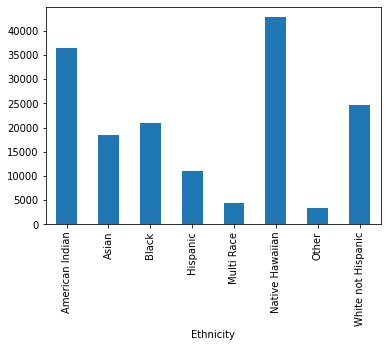

In [3]:
# YOUR CODE HERE
df_2 = df[['Age Cohort', 'Ethnicity' ,'Expenditures']].copy()
ethnicity_Average_Expenditures = df_2.groupby('Ethnicity')['Expenditures'].mean()
ethnicity_Average_Expenditures.plot.bar()



In [4]:
ageCohort_Average_Expenditures = df_2.groupby('Age Cohort')['Expenditures'].mean()
ageCohort_Average_Expenditures

Age Cohort
0 to 5       1415.280488
13 to 17     3922.613208
18 to 21     9888.537688
22 to 50    40209.283186
51+         53521.896226
6 to 12      2226.862857
Name: Expenditures, dtype: float64

In [5]:
gb = df_2.groupby(by = ['Ethnicity', 'Age Cohort'])["Expenditures"].mean()
gb = df.groupby(['Ethnicity', 'Age Cohort']).agg({'Expenditures': ['sum']})
gb.columns = ['Expenditures Sum']
gb = gb.reset_index()
gb.head()


,Ethnicity,Age Cohort,Expenditures Sum
0,American Indian,13 to 17,3726
1,American Indian,22 to 50,28205
2,American Indian,51+,113822
3,Asian,0 to 5,12018
4,Asian,13 to 17,70182


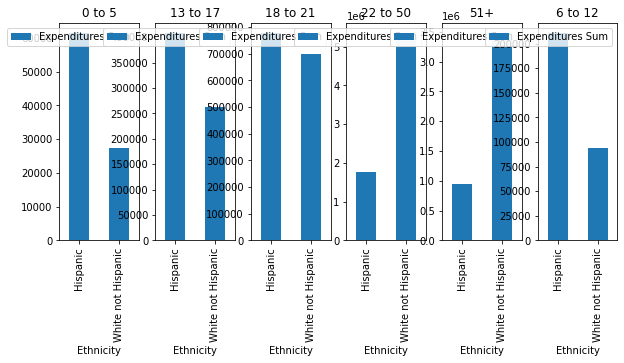

In [6]:
fig, axes = plt.subplots(1, 6, figsize=(10, 4))
races = (gb["Ethnicity"] == "Hispanic") | (gb["Ethnicity"] == "White not Hispanic")
gb = gb[races]

cohorts = gb["Age Cohort"].unique()
for ax, cohort in zip(axes, cohorts):
    (gb[gb["Age Cohort"] == cohort].
     plot.bar(x="Ethnicity", y="Expenditures Sum", ax=ax, rot = 90))
    ax.set_title(cohort)

The results tell a different story as it appears that the expenditure descrepanices between Hispanic and White groups vary by age cohort

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

When simply looking at the DDOS Expenditure rates between the White and Hispanic groups, it can tell a story that in all cases, the DDOS will spend more money if an ethnic group is White.

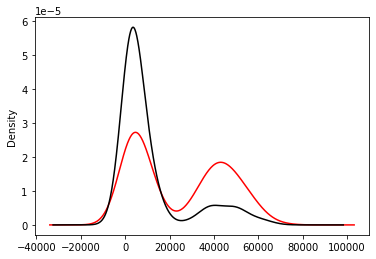

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
df[df['Ethnicity'] == "White not Hispanic"]["Expenditures"].plot.density(c = "red")
df[df['Ethnicity'] == "Hispanic"]["Expenditures"].plot.density(c = "black")

This shows that all of the expenditures, Hispanic students received more indiviudal funds, at a lower amount. Whereas, white students recieved seemingly less overall, but got larger amounts?

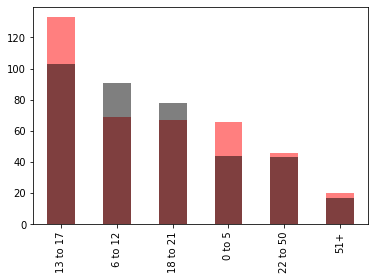

In [13]:
df[df['Ethnicity'] == "White not Hispanic"]["Age Cohort"].value_counts().plot.bar(color = "red", alpha = 0.5)
df[df['Ethnicity'] == "Hispanic"]["Age Cohort"].value_counts().plot.bar(color = "black", alpha = 0.5)


here we can see that there are more 13-17 Hispanic students and less 13-17 white students. And more white students in the 6-12 and 18-21 age. Maybe College tuition is factored in?



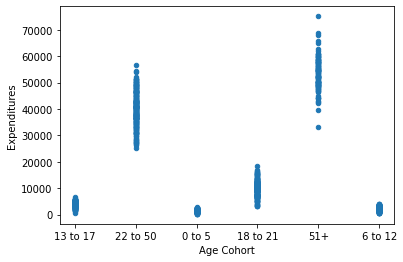

In [14]:
df.plot.scatter(x = "Age Cohort", y = "Expenditures")

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.